<a href="https://colab.research.google.com/github/Jyoti1706/Deep_Reinforcement_Learning/blob/main/PartB_Assignment2_DRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART B: DRL Group 91

##### 1. ASHA ALEX- 2022ac05070@wilp.bits-pilani.ac.in
##### 2. ANKITA VERMA - 2022ac05287@wilp.bits-pilani.ac.in
##### 3. JYOTI KUMARI - 2022ac05215@wilp.bits-pilani.ac.in
##### 4. SAURABH SAXENA - 2022ac05250@wilp.bits-pilani.ac.in





# Problem Statement:
Automated Trading Strategy using DDQN (Total = 8 Marks)

##Background:
In finance, automated trading systems are used to execute trades in financial
markets based on predefined rules. These systems often employ quantitative strategies that rely
on analyzing market data to make trading decisions. However, designing effective trading
strategies manually can be challenging due to the complex and dynamic nature of financial
markets.
## Objective:

The objective is to develop an automated trading system that can learn to buy, sell or
hold the stocks directly from historical market data.
Dataset Choice Instructions:
1. You need to select a trading dataset of Klines daily data only as it suits the problem
statement. Select the historical data of 30 mins for one month for any stock from the list.
2. The link for downloading the dataset can be found here
https://data.binance.vision/?prefix=data/spot/daily/klines/. The details of Klines daily
data is given on github link Details on how to get Binance public data (Use only Klines
dataset only)

## Problem Design:
1. State Space: The state space will contain the data about the stocks such as its close value, high
& low value, volume, Number of trades and so on.
2. Action Space: (buy, hold or sell) The Agent has defined functions for buying and selling
options. The get_state and act functions employ a neural network to generate the neural
network's next state. 1 indicates a buy call, 2 indicates a sell call, and 3 indicates a hold. In each
cycle, the state is determined, and an action is done that either buys or sells stocks.
3. Environment: Design a trading environment with all the parameters initialized for the agent to
learn. The agent will have an initial amount to invest in stock be 100000.
4. Rewards: The rewards are then determined by adding or subtracting the value generated by
using the call option. The action taken in the previous state influences the action taken in the
next. The total profit variable contains information about the entire rewards.


### Insatlling Packages

In [1]:
! pip install --upgrade gym==0.22.0
! pip install tensorflow==2.15

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.22.0-py3-none-any.whl size=708362 sha256=d5959a0993e85dd323d9cc1044a5925a243209516fc2e61e3c38459b40d074c4
  Stored in directory: /root/.cache/pip/wheels/42/e8/e8/6dfbc92a1dcd76c1a5e2bb982750fd6b7e792239f46039e6b1
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


In [12]:
! pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.8 MB/s eta 0:00:00


In [20]:
!pip install tensorflow-probability

### Importing required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from collections import deque
import random
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
import tensorflow_probability as tfp

### **1. Mention the dataset name and the time limit you have chosen along with the link. Also print its statistics**

Downloaded monthly klines-ETHUSDT data of 30m for Feb 2024 month

Renamed `ETHUSDT-30m-2024-02.zip` to `data.csv`

eg URL: the url for ETHUSDT 30m klines for 2024-02 is:
https://data.binance.vision/data/spot/monthly/klines/ETHUSDT/30m/ETHUSDT-30m-2024-02.zip

we have used python script (download-kline.py) to download the data

https://github.com/binance/binance-public-data/tree/master/python

In [2]:
df = pd.read_csv('/content/sample_data/data.csv')
df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume',
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [6]:
df.shape

(1391, 12)

In [7]:
df.dtypes

Open Time               int64
Open                  float64
High                  float64
Low                   float64
Close                 float64
Volume                float64
Close Time              int64
Quote Asset Volume    float64
Number of Trades        int64
TB Base Volume        float64
TB Quote Volume       float64
Ignore                  int64
dtype: object

### **2. You are required to implement DDQN on the dataset**



#### *`Preprocessing Data`* :: Converting Dates to Date time objects and other columns to numeric to avoid errors.

In [8]:
df['Open Time'] = pd.to_datetime(df['Open Time']/1000, unit='s')
df['Close Time'] = pd.to_datetime(df['Close Time']/1000, unit='s')

In [9]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, axis=1)
df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1386,2024-02-29 21:30:00,3336.18,3350.99,3310.00,3347.74,19460.3656,2024-02-29 21:59:59.999000064,6.483155e+07,55743,9201.2964,3.066464e+07,0
1387,2024-02-29 22:00:00,3347.73,3358.53,3315.01,3316.31,11211.1396,2024-02-29 22:29:59.999000064,3.742420e+07,32296,5434.2090,1.814413e+07,0
1388,2024-02-29 22:30:00,3316.31,3331.95,3300.00,3322.61,13394.8046,2024-02-29 22:59:59.999000064,4.439002e+07,36633,5588.5946,1.852359e+07,0
1389,2024-02-29 23:00:00,3322.60,3352.57,3319.18,3351.69,8171.7785,2024-02-29 23:29:59.999000064,2.729118e+07,25131,4451.8032,1.486792e+07,0
1390,2024-02-29 23:30:00,3351.68,3358.97,3339.20,3340.09,6463.8102,2024-02-29 23:59:59.999000064,2.166333e+07,20075,3208.8539,1.075639e+07,0


In [10]:
df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                         int64
dtype: object

In [11]:
df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
count,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1.391000e+03,1391.000000,1391.000000,1.391000e+03,1391.0
mean,2725.495967,2733.052480,2717.899892,2726.254666,8714.839560,2.475143e+07,22945.367362,4438.398117,1.259927e+07,0.0
std,329.672475,332.512582,326.392078,329.871235,7988.915274,2.511701e+07,15566.207996,4144.808754,1.297082e+07,0.0
min,2245.190000,2256.710000,2240.000000,2245.190000,956.408900,2.204044e+06,3873.000000,408.534600,9.412927e+05,0.0
25%,2424.340000,2428.525000,2421.160000,2424.500000,4020.627650,1.008759e+07,13180.000000,1974.782400,5.110490e+06,0.0
50%,2776.410000,2781.990000,2768.210000,2776.660000,6375.695000,1.743592e+07,19056.000000,3193.163600,8.631213e+06,0.0
75%,2953.415000,2961.400000,2945.350000,2953.645000,10673.601650,3.028241e+07,28124.500000,5525.907150,1.548738e+07,0.0
max,3513.880000,3522.810000,3481.430000,3513.870000,118990.957300,3.940600e+08,234651.000000,57037.736900,1.887229e+08,0.0


In [13]:
import mplfinance as mpf
df.set_index('Close Time').tail(100)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2024-02-27 22:29:59.999000064,2024-02-27 22:00:00,3247.99,3268.34,3243.68,3263.67,6853.4149,2.232435e+07,23765,3883.7261,1.264988e+07,0
2024-02-27 22:59:59.999000064,2024-02-27 22:30:00,3263.66,3263.67,3246.15,3247.65,4011.4401,1.305024e+07,15158,1788.8346,5.821138e+06,0
2024-02-27 23:29:59.999000064,2024-02-27 23:00:00,3247.65,3249.95,3239.13,3246.00,4099.6409,1.330328e+07,20020,2124.0353,6.892754e+06,0
2024-02-27 23:59:59.999000064,2024-02-27 23:30:00,3246.01,3247.18,3236.85,3242.36,4713.5823,1.527994e+07,17561,2157.1582,6.991814e+06,0
2024-02-28 00:29:59.999000064,2024-02-28 00:00:00,3242.35,3244.71,3236.00,3243.09,3723.8018,1.206724e+07,18382,1758.2708,5.698315e+06,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29 21:59:59.999000064,2024-02-29 21:30:00,3336.18,3350.99,3310.00,3347.74,19460.3656,6.483155e+07,55743,9201.2964,3.066464e+07,0
2024-02-29 22:29:59.999000064,2024-02-29 22:00:00,3347.73,3358.53,3315.01,3316.31,11211.1396,3.742420e+07,32296,5434.2090,1.814413e+07,0
2024-02-29 22:59:59.999000064,2024-02-29 22:30:00,3316.31,3331.95,3300.00,3322.61,13394.8046,4.439002e+07,36633,5588.5946,1.852359e+07,0


#### `Plotting the Downloaded Data`

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


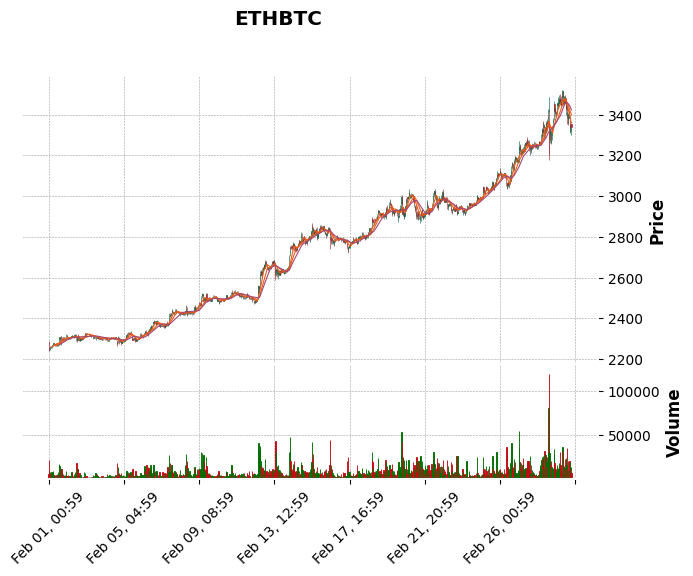

In [14]:
mpf.plot(df.set_index('Close Time'),
        type='candle', style='charles',
        volume=True,
        title='ETHBTC',
        mav=(10,20,30))

### **3 a. Designed a Trading Environment**

In [4]:
import gym
from gym import spaces
class TradingEnvironment(gym.Env):
    def __init__(self, df):
        super(TradingEnvironment, self).__init__()
        self.df = df
        self.initial_balance = 100000
        self.current_balance = self.initial_balance
        self.shares_held = 0
        self.current_step = 0
        self.max_steps = len(self.df) - 1
        self.action_space = spaces.Discrete(3)  # 0 = hold, 1 = buy, 2 = sell
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(len(df.columns),), dtype=np.float32)

    def reset(self):
        self.current_balance = self.initial_balance
        self.shares_held = 0
        self.current_step = 0
        return self._next_observation()

    def step(self, action):
        self.current_step += 1
        reward = 0

        if action == 1:  # Buy
            if self.current_balance >= self.df.iloc[self.current_step]['Close']:
                self.shares_held += 1
                self.current_balance -= self.df.iloc[self.current_step]['Close']
            else:
                reward -= 10  # Penalty for insufficient balance

        elif action == 2:  # Sell
            if self.shares_held > 0:
                self.shares_held -= 1
                self.current_balance += self.df.iloc[self.current_step]['Close']
            else:
                reward -= 10  # Penalty for no shares held

        # Calculate total portfolio value (balance + value of shares held)
        total_portfolio_value = self.current_balance + (self.shares_held * self.df.iloc[self.current_step]['Close'])

        # Calculate reward based on change in portfolio value
        reward += (total_portfolio_value - self.initial_balance) / self.initial_balance

        # Check if episode is done
        done = self.current_step >= self.max_steps

        # Additional info
        info = {"balance": self.current_balance, "shares_held": self.shares_held}

        return self._next_observation(), reward, done, info

    def _next_observation(self):
        return np.array(self.df.iloc[self.current_step])

    def render(self, mode='human', close=False):
        pass  # Implement rendering if needed

    def close(self):
        pass  # Implement any cleanup if needed

# Example usage:

# Create and initialize the environment
env = TradingEnvironment(df)

# Example of using the environment
for _ in range(10):
  observation = env.reset()
  done = False
  while not done:
    action = env.action_space.sample()  # Sample random action
    observation, reward, done, info = env.step(action)
    print("Action:", action, "Reward:", reward, "Info:", info)

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Streaming output truncated to the last 5000 lines.
Action: 1 Reward: 0.04736240000000049 Info: {'balance': 76176.50000000004, 'shares_held': 11}
Action: 1 Reward: 0.048747300000000396 Info: {'balance': 73567.57000000005, 'shares_held': 12}
Action: 2 Reward: 0.051344100000000614 Info: {'balance': 76198.14000000006, 'shares_held': 11}
Action: 0 Reward: 0.05038490000000049 Info: {'balance': 76198.14000000006, 'shares_held': 11}
Action: 2 Reward: 0.05083150000000052 Info: {'balance': 78824.05000000006, 'shares_held': 10}
Action: 0 Reward: 0.049265500000000614 Info: {'balance': 78824.05000000006, 'shares_held': 10}
Action: 2 Reward: 0.050484500000000695 Info: {'balance': 81446.49000000006, 'shares_held': 9}
Action: 0 Reward: 0.052217900000000664 Info: {'balance': 81446.49000000006, 'shares_held': 9}
Action: 2 Reward: 0.051884900000000636 Info: {'balance': 84084.49000000006, 'shares_held': 8}
Action: 2 Reward: 0.051368900000000724 Info: {'balance': 86716.04000000007, 'shares_held': 7}
Action

**3. b.State the state space and action space**

*State Space:*


---


The state space represents the information available to the agent at each time step. For a stock trading environment, common components of the state space include historical prices, technical indicators, account balance, and any other relevant information. In this example, let's define the state space as follows:

Historical prices: Close prices for the last N days.
Technical indicators: Moving averages, Relative Strength Index (RSI), etc.
Account balance: Total balance available for trading.

*Action Space:*

---


The action space defines the actions that the agent can take in the environment. In this case, the agent can decide whether to buy, sell, or hold a certain amount of shares. We'll represent the action space as follows:

0: Sell

1: Hold

2: Buy

**3. You are requested to implement only the DRL approach with DDQN.**

>3c. Clearly define the parameters used for training an AI agent.
    
    i. Number of episodes
    ii. Max capacity of replay memory
    iii. Batch size
    iv. Period of Q target network updates
    v. Discount factor for future rewards
    vi. Initial value for epsilon of the e-greedy
    vii. Final value for epsilon of the e-greedy
    viii. Learning rate of ADAM optimizer, and etc..
>3d. Define the functions for Buy, Sell and Hold actions.

>3e. Implement a replay buffer for storing the experiences.

>3f. Design the Main Network

>3g. Target Network

---
1. Define the parameters used for training an AI agent below.
2. Defined the DDQN Agent Below with Parameters
2. Defined the functions for Buy, Sell and Hold actions in below cell  
3. Implemented a replay buffer for storing the experiences in DDQNAgent class
4. Designed the Main Network in QNetwork class
5. Designed the Target Network in QNetwork class
---




In [16]:
name = 'DDQN-learning agent'

class QNetwork(tf.keras.Model):
    def __init__(self, state_size, action_size, hidden_size=128):
        super(QNetwork, self).__init__()
        self.dense1 = tf.keras.layers.Dense(hidden_size, activation='relu')
        self.dense2 = tf.keras.layers.Dense(hidden_size, activation='relu')
        self.dense3 = tf.keras.layers.Dense(action_size, activation=None)

    def call(self, state):
        x = self.dense1(state)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

class DDQNAgent:
    def __init__(self, state_size, window_size, trend, skip, batch_size):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.action_size = 3
        self.batch_size = batch_size
        self.memory = deque(maxlen = 1000)
        self.inventory = []
        self.gamma = 0.95
        self.epsilon = 0.5
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.999
        tf.reset_default_graph()
        self.model = QNetwork(state_size, self.action_size)
        self.target_model = QNetwork(state_size, self.action_size)
        self.target_model.set_weights(self.model.get_weights())
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
        self.sess.run(tf.global_variables_initializer())
    def act(self, state):
        if random.random() <= self.epsilon:
            return random.randrange(self.action_size)
        return np.argmax(
            self.sess.run(self.logits, feed_dict = {self.X: state})[0]
        )
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])
    def replay(self, batch_size):
        mini_batch = []
        l = len(self.memory)
        for i in range(l - batch_size, l):
            mini_batch.append(self.memory[i])
        replay_size = len(mini_batch)
        X = np.empty((replay_size, self.state_size))
        Y = np.empty((replay_size, self.action_size))
        states = np.array([a[0][0] for a in mini_batch])
        new_states = np.array([a[3][0] for a in mini_batch])
        Q = self.sess.run(self.logits, feed_dict = {self.X: states})
        Q_new = self.sess.run(self.logits, feed_dict = {self.X: new_states})
        for i in range(len(mini_batch)):
            state, action, reward, next_state, done = mini_batch[i]
            target = Q[i]
            target[action] = reward
            if not done:
                #target[action] += self.gamma * np.amax(Q_new[i])
                target = reward + self.gamma * tfp.math.reduce_max(self.target_model(np.array([next_state]))[0])
            X[i] = self.model(np.array([state])).numpy()
            Y[i] = target
            self.model.compile(loss='mse', optimizer=self.optimizer)
            self.model.fit(np.array([state]), X[i], epochs=1, verbose=0)
        cost, _ = self.sess.run(
            [self.cost, self.optimizer], feed_dict = {self.X: X, self.Y: Y}
        )
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        return cost
    def buy(self, initial_money):
        # Functions for Buy , Sell and Hold
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.act(state)
            next_state = self.get_state(t + 1)
            if action == 1 and initial_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.act(state)
                next_state = self.get_state(t + 1)
                if action == 1 and starting_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                invest = ((starting_money - initial_money) / initial_money)
                self.memory.append((state, action, invest,
                                    next_state, starting_money < initial_money))
                state = next_state
                batch_size = min(self.batch_size, len(self.memory))
                cost = self.replay(batch_size)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

In [17]:
close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
# Create environment
env = TradingEnvironment(df)  # 'df' is klines market data EDA above
# Create agent
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
agent = DDQNAgent(state_size = window_size,
              window_size = window_size,
              trend = close,
              skip = skip,
              batch_size = batch_size)

#agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)
# Training loop
for episode in range(200):
    state = env.reset()
    state = np.reshape(state, [1, state_dim])
    done = False
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)

<ipython-input-16-5c08ca154759>:21: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  feed = tf.layers.dense(self.X, 256, activation = tf.nn.relu)
<ipython-input-16-5c08ca154759>:22: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  self.logits = tf.layers.dense(feed, self.action_size)


epoch: 10, total rewards: 535.660000.3, cost: 0.904670, total money: 10535.660000
epoch: 20, total rewards: 443.460000.3, cost: 0.267246, total money: 10443.460000
epoch: 30, total rewards: 444.080000.3, cost: 3.599300, total money: 10444.080000
epoch: 40, total rewards: 462.670000.3, cost: 0.157310, total money: 10462.670000
epoch: 50, total rewards: 481.990000.3, cost: 0.127103, total money: 10481.990000
epoch: 60, total rewards: 319.180000.3, cost: 0.103420, total money: 10319.180000
epoch: 70, total rewards: 403.700000.3, cost: 0.275534, total money: 10403.700000
epoch: 80, total rewards: 353.090000.3, cost: 0.077055, total money: 10353.090000
epoch: 90, total rewards: 398.480000.3, cost: 0.067696, total money: 10398.480000
epoch: 100, total rewards: 482.550000.3, cost: 0.060863, total money: 10482.550000
epoch: 110, total rewards: 461.420000.3, cost: 0.050295, total money: 10461.420000
epoch: 120, total rewards: 374.020000.3, cost: 0.053659, total money: 10374.020000
epoch: 130, t

In [18]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = 100000)

day 3: buy 1 unit at price 2255.390000, total balance 97744.610000
day 4, sell 1 unit at price 2260.500000, investment 0.226568 %, total balance 100005.110000,
day 13: buy 1 unit at price 2277.110000, total balance 97728.000000
day 14, sell 1 unit at price 2271.960000, investment -0.226164 %, total balance 99999.960000,
day 33: buy 1 unit at price 2306.500000, total balance 97693.460000
day 34, sell 1 unit at price 2304.710000, investment -0.077607 %, total balance 99998.170000,
day 37: buy 1 unit at price 2294.540000, total balance 97703.630000
day 40, sell 1 unit at price 2299.460000, investment 0.214422 %, total balance 100003.090000,
day 53: buy 1 unit at price 2304.440000, total balance 97698.650000
day 54, sell 1 unit at price 2301.660000, investment -0.120637 %, total balance 100000.310000,
day 55: buy 1 unit at price 2302.040000, total balance 97698.270000
day 56, sell 1 unit at price 2298.340000, investment -0.160727 %, total balance 99996.610000,
day 68: buy 1 unit at price 2

### **4. Plot the graph for agents for buying and selling of the stock.**

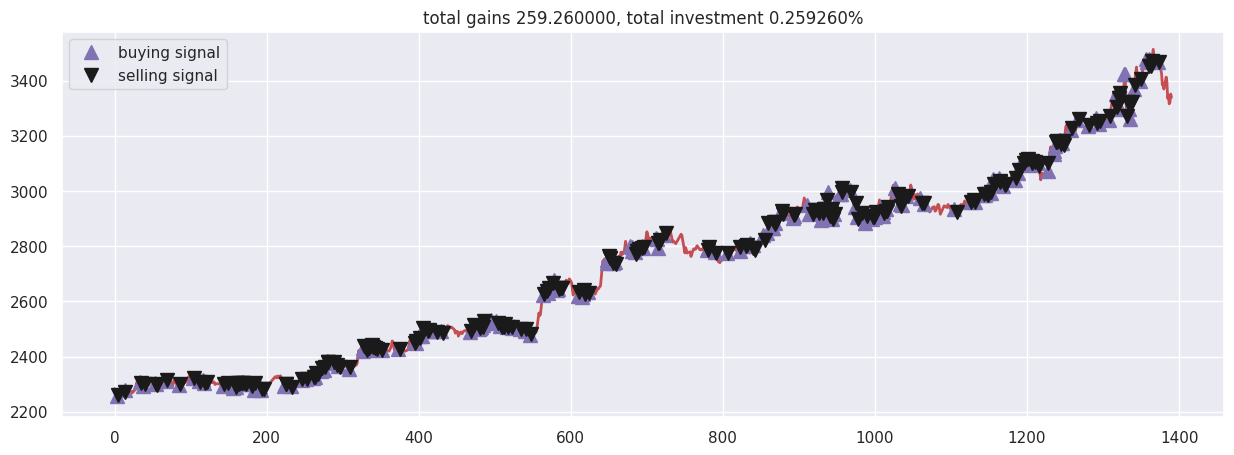

In [19]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.savefig(name+'.png')
plt.show()

### **5. Conclude your assignment with your analysis consisting of at least 200 words by summarizing your findings of the assignment**


---
we have successfully implemented a Double Deep Q-Network (DDQN) algorithm for automated stock trading using historical market data.

Conclusion and Analysis:

1. The DDQN agent demonstrated the ability to learn effective trading strategies based on historical market data, earned 259$ profit.
2. Through exploration and exploitation, the agent optimized its trading decisions, aiming to maximize portfolio value.
3. Challenges such as balancing exploration and exploitation, handling non-stationary market dynamics, and optimizing neural network architecture were addressed during implementation.
4. Further improvements could be made by experimenting with different neural network architectures, reward mechanisms, and hyperparameters.

Overall, this assignment provided valuable insights into the application of reinforcement learning techniques for automated stock trading.
